In [862]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


In [863]:
marketing = pd.read_csv("C:/Users/VIN/Documents/PROJECT FOLDER/Marketing Data.csv")
revenue1 = pd.read_csv("C:/Users/VIN/Documents/PROJECT FOLDER/Revenue Data 1.csv")
revenue2 = pd.read_csv("C:/Users/VIN/Documents/PROJECT FOLDER/Revenue Data 2.csv")
visitors = pd.read_excel("C:/Users/VIN/Documents/PROJECT FOLDER/Visitors Data.xlsx")

In [864]:
display(marketing.head(),marketing.tail(),visitors.head(),visitors.tail())

,Date,Marketing Spend,Promo
0,09/11/2020,651.375,No Promo
1,10/11/2020,1298.250,Promotion Red
2,11/11/2020,1559.375,Promotion Blue
3,12/11/2020,1801.750,No Promo
4,13/11/2020,2614.500,No Promo


,Date,Marketing Spend,Promo
180,08/05/2021,1121.875,No Promo
181,09/05/2021,871.000,No Promo
182,10/05/2021,NaN,NaN
183,11/05/2021,NaN,NaN
184,12/05/2021,NaN,NaN


,Date,Visitors
0,2020-11-09,707.0
1,2020-11-10,1455.0
2,2020-11-11,1520.0
3,2020-11-12,1726.0
4,2020-11-13,2134.0


,Date,Visitors
180,2021-05-08,1483.0
181,2021-05-09,1303.0
182,2021-05-10,NaN
183,2021-05-11,NaN
184,2021-05-12,NaN


In [865]:
display(revenue1.head(),revenue1.tail(),revenue2.head(),revenue2.tail())

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020,Friday,10000.0


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
128,17/03/2021,53.0,3.0,15.0,2021,Wednesday,1245.0
129,18/03/2021,NaN,NaN,NaN,2021,NaN,NaN
130,19/03/2021,NaN,NaN,NaN,2021,NaN,NaN
131,20/03/2021,NaN,NaN,NaN,2021,NaN,NaN
132,21/03/2021,NaN,NaN,NaN,2021,NaN,NaN


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
1,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
2,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
3,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0
4,22/03/2021,54.0,3.0,15.0,2021.0,Monday,9209.0


,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
51,08/05/2021,60.0,5.0,17.0,2021.0,Saturday,5927.0
52,09/05/2021,61.0,5.0,17.0,2021.0,Sunday,3861.0
53,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
54,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
55,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [866]:
revenue1.drop([129,130,131,132],axis = 0, inplace = True)

In [867]:
Marketing=revenue1.append(revenue2,ignore_index = True)
Marketing

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
0,09/11/2020,34.0,11.0,11.0,2020.0,Monday,465.0
1,10/11/2020,34.0,11.0,11.0,2020.0,Tuesday,10386.0
2,11/11/2020,34.0,11.0,11.0,2020.0,Wednesday,12475.0
3,12/11/2020,34.0,11.0,11.0,2020.0,Thursday,11712.0
4,13/11/2020,34.0,11.0,11.0,2020.0,Friday,10000.0
...,...,...,...,...,...,...,...
180,08/05/2021,60.0,5.0,17.0,2021.0,Saturday,5927.0
181,09/05/2021,61.0,5.0,17.0,2021.0,Sunday,3861.0
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN


In [868]:
Marketing.loc[126:139,:]

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue
126,15/03/2021,53.0,3.0,15.0,2021.0,Monday,3378.0
127,16/03/2021,53.0,3.0,15.0,2021.0,Tuesday,6047.0
128,17/03/2021,53.0,3.0,15.0,2021.0,Wednesday,1245.0
129,18/03/2021,53.0,3.0,15.0,2021.0,Thursday,14909.0
130,19/03/2021,53.0,3.0,15.0,2021.0,Friday,5903.0
131,20/03/2021,53.0,3.0,15.0,2021.0,Saturday,4169.0
132,21/03/2021,54.0,3.0,15.0,2021.0,Sunday,9486.0
133,22/03/2021,54.0,3.0,15.0,2021.0,Monday,9209.0
134,23/03/2021,54.0,3.0,15.0,2021.0,Tuesday,11494.0
135,24/03/2021,54.0,3.0,15.0,2021.0,Wednesday,15190.0


In [869]:
display(Marketing.info(),visitors.info(),marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          185 non-null    object 
 1   Week_ID       182 non-null    float64
 2   Month Number  182 non-null    float64
 3   Month_ID      182 non-null    float64
 4   Year          182 non-null    float64
 5   Day_Name      182 non-null    object 
 6   Revenue       178 non-null    float64
dtypes: float64(5), object(2)
memory usage: 10.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      185 non-null    datetime64[ns]
 1   Visitors  177 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 3 columns):
 #   

None

None

None

In [870]:
Marketing["Date"] = pd.to_datetime(Marketing["Date"],format = "%d/%m/%Y")
marketing["Date"] = pd.to_datetime(marketing["Date"],format = "%d/%m/%Y")

In [871]:
Marketing=pd.merge(Marketing,marketing)
Marketing

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo
...,...,...,...,...,...,...,...,...,...
180,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875,No Promo
181,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.0,871.000,No Promo
182,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [872]:
Marketing=pd.merge(Marketing,visitors)
Marketing

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375,No Promo,707.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250,Promotion Red,1455.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375,Promotion Blue,1520.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750,No Promo,1726.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500,No Promo,2134.0
...,...,...,...,...,...,...,...,...,...,...
180,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875,No Promo,1483.0
181,2021-05-09,61.0,5.0,17.0,2021.0,Sunday,3861.0,871.000,No Promo,1303.0
182,2021-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,2021-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [873]:
Marketing.drop([182,183,184],axis=0,inplace=True)

In [874]:
Marketing.isna().sum()

Date               0
Week_ID            0
Month Number       0
Month_ID           0
Year               0
Day_Name           0
Revenue            4
Marketing Spend    4
Promo              0
Visitors           5
dtype: int64

## Exploratory Data Analysis

In [875]:
Marketing.groupby(['Promo','Day_Name'])[['Revenue','Marketing Spend','Visitors']].mean()

Revenue  Marketing Spend     Visitors
Promo          Day_Name                                             
No Promo       Friday      6376.181818      1601.796263  1926.636364
               Monday      4362.300000       893.067447  1383.090909
               Saturday    4775.363636       839.546511  1295.100000
               Sunday      5748.000000       954.442424  1513.000000
               Thursday    9139.153846      1769.519814  2249.083333
               Tuesday     4607.600000       914.926389  1373.500000
               Wednesday   5540.900000      1075.767854  1517.111111
Promotion Blue Friday     21088.181818      2315.024311  2163.272727
               Monday     11663.500000      1874.015000  1772.000000
               Saturday   16429.000000      1940.668056  1521.571429
               Sunday     12379.125000      1393.211269  1396.777778
               Thursday   22492.000000      2430.280520  2258.571429
               Tuesday    14547.833333      1448.866330  1654.500000
               Wednesday  12719.000000      1339.219792  1552.000000
Promotion Red  Friday     12551.750000      1495.160185  1547.500000
               Monday      9790.111111       981.142096  1470.400000
               Saturday    9190.142857       953.681061  1285.857143
               Sunday     10697.666667      1290.438889  1573.000000
               Thursday   13165.833333      1974.159891  2318.166667
               Tuesday     9179.200000       927.293182  1367.400000
               Wednesday  13250.875000      1598.533153  1800.000000

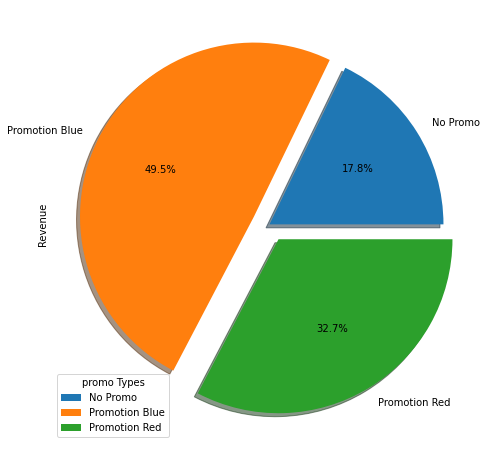

In [876]:
plt.subplots(figsize = (8,8))
Marketing.groupby('Promo')['Revenue'].mean().plot.pie(shadow = True,explode =[0.0,0.1,0.1],autopct ='%1.1f%%')
plt.legend(title = 'promo Types')
plt.show()

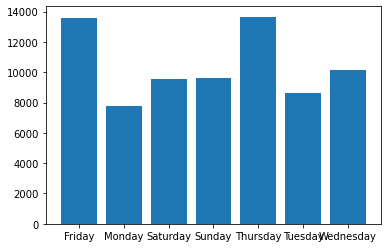

In [877]:
#plt.figure(figsize = (12,6))
j=Marketing.groupby('Day_Name')['Revenue'].mean().to_frame().reset_index()
plt.bar(j['Day_Name'],j['Revenue'])
plt.show()

## Machine Learning

In [878]:
from sklearn.preprocessing import OneHotEncoder

In [879]:
enc= OneHotEncoder(handle_unknown = 'ignore')

In [880]:
enc1 =pd.DataFrame(enc.fit_transform(Marketing[['Day_Name','Promo']]).toarray())
enc1

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
178,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
179,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
180,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [881]:
Model_Data = Marketing.join(enc1)
Model_Data

,Date,Week_ID,Month Number,Month_ID,Year,Day_Name,Revenue,Marketing Spend,Promo,Visitors,0,1,2,3,4,5,6,7,8,9
0,2020-11-09,34.0,11.0,11.0,2020.0,Monday,465.0,651.375000,No Promo,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2020-11-10,34.0,11.0,11.0,2020.0,Tuesday,10386.0,1298.250000,Promotion Red,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2020-11-11,34.0,11.0,11.0,2020.0,Wednesday,12475.0,1559.375000,Promotion Blue,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2020-11-12,34.0,11.0,11.0,2020.0,Thursday,11712.0,1801.750000,No Promo,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2020-11-13,34.0,11.0,11.0,2020.0,Friday,10000.0,2614.500000,No Promo,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,2021-05-05,60.0,5.0,17.0,2021.0,Wednesday,7284.0,1119.600000,No Promo,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
178,2021-05-06,60.0,5.0,17.0,2021.0,Thursday,13021.0,2067.888889,Promotion Red,2244.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
179,2021-05-07,60.0,5.0,17.0,2021.0,Friday,4587.0,NaN,No Promo,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
180,2021-05-08,60.0,5.0,17.0,2021.0,Saturday,5927.0,1121.875000,No Promo,1483.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [882]:
Model_Data.drop(['Date','Day_Name','Promo'], axis =1 , inplace = True)

In [883]:
display(Model_Data.head(), Model_Data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 181
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week_ID          182 non-null    float64
 1   Month Number     182 non-null    float64
 2   Month_ID         182 non-null    float64
 3   Year             182 non-null    float64
 4   Revenue          178 non-null    float64
 5   Marketing Spend  178 non-null    float64
 6   Visitors         177 non-null    float64
 7   0                182 non-null    float64
 8   1                182 non-null    float64
 9   2                182 non-null    float64
 10  3                182 non-null    float64
 11  4                182 non-null    float64
 12  5                182 non-null    float64
 13  6                182 non-null    float64
 14  7                182 non-null    float64
 15  8                182 non-null    float64
 16  9                182 non-null    float64
dtypes: float64(17)
m

,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,34.0,11.0,11.0,2020.0,465.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0,11.0,11.0,2020.0,10386.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,34.0,11.0,11.0,2020.0,12475.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,34.0,11.0,11.0,2020.0,11712.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,34.0,11.0,11.0,2020.0,10000.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


None

In [884]:
data_corr = Model_Data.corr()
data_corr

,Week_ID,Month Number,Month_ID,Year,Revenue,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
Week_ID,1.000000,-0.631898,0.986144,0.807718,-0.047284,-0.107220,-0.032206,-0.006270,-0.008265,-0.006270,0.045602,-0.008265,-0.008265,-0.008265,-0.001453,-0.021379,0.022941
Month Number,-0.631898,1.000000,-0.601891,-0.965465,0.064203,0.116264,0.020297,-0.022469,0.011234,-0.018724,-0.018724,0.018724,0.014979,0.014979,-0.015801,0.001324,0.015667
Month_ID,0.986144,-0.601891,1.000000,0.789160,-0.044918,-0.096467,-0.017917,0.007567,-0.018917,0.016395,0.016395,-0.001261,-0.010089,-0.010089,0.004216,-0.019173,0.014640
Year,0.807718,-0.965465,0.789160,1.000000,-0.064137,-0.120995,-0.021463,0.019749,-0.014812,0.019749,0.019749,-0.014812,-0.014812,-0.014812,0.013528,-0.007273,-0.007273
Revenue,-0.047284,0.064203,-0.044918,-0.064137,1.000000,0.773106,0.546915,0.209338,-0.171910,-0.062639,-0.054435,0.217007,-0.123133,-0.023744,-0.622967,0.631666,0.041906
Marketing Spend,-0.107220,0.116264,-0.096467,-0.120995,0.773106,1.000000,0.834369,0.294848,-0.166547,-0.110966,-0.104548,0.356029,-0.209757,-0.051884,-0.267057,0.422957,-0.136457
Visitors,-0.032206,0.020297,-0.017917,-0.021463,0.546915,0.834369,1.000000,0.253715,-0.140710,-0.239282,-0.138992,0.490352,-0.186574,-0.039754,-0.049039,0.146646,-0.094168
0,-0.006270,-0.022469,0.007567,0.019749,0.209338,0.294848,0.253715,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,0.112941,-0.127672
1,-0.008265,0.011234,-0.018917,-0.014812,-0.171910,-0.166547,-0.140710,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,-0.093299,0.078567
2,-0.006270,-0.018724,0.016395,0.019749,-0.062639,-0.110966,-0.239282,-0.166667,-0.166667,1.000000,-0.166667,-0.166667,-0.166667,-0.166667,0.013700,0.009821,-0.024552


In [885]:
Model_Data.shape

(182, 17)

In [886]:
x = Model_Data.drop('Revenue', axis=1)
y = Model_Data['Revenue']

In [887]:
display(x.shape, y.shape)

(182, 16)

(182,)

In [888]:
display(x.head(),y.head())

,Week_ID,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,34.0,11.0,11.0,2020.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0,11.0,11.0,2020.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,34.0,11.0,11.0,2020.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,34.0,11.0,11.0,2020.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,34.0,11.0,11.0,2020.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


0      465.0
1    10386.0
2    12475.0
3    11712.0
4    10000.0
Name: Revenue, dtype: float64

In [889]:
y.isnull().sum()

4

In [890]:
y.fillna(y.mean(),inplace = True)

In [891]:
y.isnull().sum()

0

In [892]:
x.head()

,Week_ID,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,34.0,11.0,11.0,2020.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0,11.0,11.0,2020.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,34.0,11.0,11.0,2020.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,34.0,11.0,11.0,2020.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,34.0,11.0,11.0,2020.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [893]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 123)

In [894]:
display(x_train.head(),x_test.head(),y_train.head(),y_test.head())

,Week_ID,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
20,37.0,11.0,11.0,2020.0,1330.875000,1698.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
138,54.0,3.0,15.0,2021.0,868.888889,1437.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28,38.0,12.0,12.0,2020.0,961.200000,1584.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,36.0,11.0,11.0,2020.0,2745.375000,2138.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
146,56.0,4.0,16.0,2021.0,754.500000,1406.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


,Week_ID,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
168,59.0,4.0,16.0,2021.0,843.800000,1105.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104,50.0,2.0,14.0,2021.0,829.111111,1464.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
41,40.0,12.0,12.0,2020.0,1304.111111,1828.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,34.0,11.0,11.0,2020.0,2614.500000,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
173,59.0,5.0,17.0,2021.0,805.636364,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


20     10647.000000
138     3181.000000
28     10471.134831
13     14012.000000
146     6388.000000
Name: Revenue, dtype: float64

168     3884.0
104     5171.0
41      7655.0
4      10000.0
173     7445.0
Name: Revenue, dtype: float64

In [895]:
display(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(127, 16)

(55, 16)

(127,)

(55,)

In [896]:
imputer = KNNImputer(n_neighbors=3)
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [897]:
x_train

array([[37., 11., 11., ...,  0.,  0.,  1.],
       [54.,  3., 15., ...,  1.,  0.,  0.],
       [38., 12., 12., ...,  0.,  0.,  1.],
       ...,
       [44.,  1., 13., ...,  0.,  0.,  1.],
       [53.,  3., 15., ...,  1.,  0.,  0.],
       [50.,  2., 14., ...,  0.,  1.,  0.]])

In [898]:
x.head()

,Week_ID,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,34.0,11.0,11.0,2020.0,651.375,707.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,34.0,11.0,11.0,2020.0,1298.250,1455.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,34.0,11.0,11.0,2020.0,1559.375,1520.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,34.0,11.0,11.0,2020.0,1801.750,1726.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,34.0,11.0,11.0,2020.0,2614.500,2134.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [961]:
col = ['Week_ID','Month Number','Month_ID','Year','Marketing Spend','Visitors',0,1,2,3,4,5,6,7,8,9]

In [962]:
new_x = pd.DataFrame(x_train, columns= col)

In [963]:
display(new_x.head())

,Week_ID,Month Number,Month_ID,Year,Marketing Spend,Visitors,0,1,2,3,4,5,6,7,8,9
0,37.0,11.0,11.0,2020.0,1330.875000,1698.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,54.0,3.0,15.0,2021.0,868.888889,1437.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38.0,12.0,12.0,2020.0,961.200000,1584.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36.0,11.0,11.0,2020.0,2745.375000,2138.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,56.0,4.0,16.0,2021.0,754.500000,1406.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [902]:
new_x.isna().sum()

Week_ID            0
Month Number       0
Month_ID           0
Year               0
Marketing Spend    0
Visitors           0
0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
dtype: int64

In [903]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(new_x,y_train)
imp = pd.DataFrame(mutual_info_regression(new_x,y_train), index=new_x.columns)
imp.columns = ['Importance']
imp.sort_values(by = 'Importance', ascending = False)

,Importance
Marketing Spend,0.520956
Visitors,0.411271
7,0.350163
8,0.235716
9,0.192067
1,0.074787
0,0.058942
Year,0.038770
3,0.028704
6,0.026744


In [904]:
imp[imp['Importance']>0.02].sort_values(by='Importance', ascending= False)

,Importance
Marketing Spend,0.520956
Visitors,0.411271
7,0.350163
8,0.235716
9,0.192067
1,0.074787
0,0.058942
Year,0.038770
3,0.028704
6,0.026744


In [905]:
## dealing with outliers

def d_outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    outliers = df[((df<lower_limit) | (df>upper_limit))]
    
    df[df > upper_limit] = upper_limit
    df[df < lower_limit] = lower_limit
        
    return lower_limit,upper_limit,outliers 

In [906]:
display(d_outlier(new_x['Marketing Spend']),
d_outlier(new_x['Visitors']))

(-402.051136625,
 3089.5640155749998,
 75     4284.750
 94     3524.500
 114    4535.375
 Name: Marketing Spend, dtype: float64)

(331.25,
 3089.25,
 23    4139.0
 Name: Visitors, dtype: float64)

In [964]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_x) 
new_x_train = scaler.transform(new_x)
x_test = scaler.transform(x_test)

C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [908]:
new_x_train

array([[-1.23762161,  1.29901041, -1.48142734, ..., -0.80582296,
        -0.64117947,  1.47478812],
       [ 0.91376733, -0.56510622,  0.75834971, ...,  1.24096736,
        -0.64117947, -0.6780635 ],
       [-1.11106932,  1.53202499, -0.92148308, ..., -0.80582296,
        -0.64117947,  1.47478812],
       ...,
       [-0.35175558, -1.03113538, -0.36153881, ..., -0.80582296,
        -0.64117947,  1.47478812],
       [ 0.78721504, -0.56510622,  0.75834971, ...,  1.24096736,
        -0.64117947, -0.6780635 ],
       [ 0.40755816, -0.7981208 ,  0.19840545, ..., -0.80582296,
         1.55962573, -0.6780635 ]])

In [909]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [910]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [911]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeRegressor()
    elif input_ml_algo == 'RF':
        model = RandomForestRegressor()
    elif input_ml_algo == 'XGBC':
        model = XGBRegressor()
    elif input_ml_algo == 'LR':
        model = LinearRegression()
    elif input_ml_algo == 'KNN':
        model = KNeighborsRegressor()
    return model


In [912]:
# LINEAR REGRESSION MODEL
modell= model_to_use('LR')
modell

LinearRegression()

In [913]:
modell.fit(new_x_train,y_train)

LinearRegression()

In [914]:
y_train_pred = modell.predict(new_x_train) 
y_pred = modell.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_train_pred))
print('Test r2 score: ', r2_score(y_test, y_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_train_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_train_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_pred))

Train r2 score :  0.7460939296715252
Test r2 score:  0.7643281332953008


Train Mean Score:  2239.194304258652
Test Mean Score: 1808.0383343300232


 Train Mean Sq Score 10510940.219376786
Test Mean Sq Score 5667664.361756285


In [915]:
model2= model_to_use('RF')
model2

RandomForestRegressor()

In [916]:
model2.fit(new_x_train,y_train)

RandomForestRegressor()

In [917]:
y_tr_rf_pred = model2.predict(new_x_train) 
y_test_pred = model2.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_rf_pred))
print('Test r2 score: ', r2_score(y_test, y_test_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_rf_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_test_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_rf_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_test_pred))

Train r2 score :  0.9625477170313775
Test r2 score:  0.8406467294846915


Train Mean Score:  743.1470052198532
Test Mean Score: 1493.6147803881513


 Train Mean Sq Score 1550410.7753434284
Test Mean Sq Score 3832281.149453439


In [918]:
model3= model_to_use('KNN')
model3

KNeighborsRegressor()

In [919]:
model3.fit(new_x_train,y_train)

KNeighborsRegressor()

In [920]:
y_tr_kn_pred = model3.predict(new_x_train) 
y_tes_pred = model3.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_kn_pred))
print('Test r2 score: ', r2_score(y_test, y_tes_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_kn_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_tes_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_kn_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_tes_pred))

Train r2 score :  0.7125760628957435
Test r2 score:  0.4042482566138017


Train Mean Score:  2510.1517296293023
Test Mean Score: 3104.460837589377


 Train Mean Sq Score 11898478.112840721
Test Mean Sq Score 14327212.541983083


In [921]:
model4= model_to_use('XGBC')
model4

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [922]:
model4.fit(new_x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [923]:
y_tr_xgb_pred = model4.predict(new_x_train) 
y_test_preds = model4.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_xgb_pred))
print('Test r2 score: ', r2_score(y_test, y_test_preds))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_xgb_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_test_preds))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_xgb_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_test_preds))

Train r2 score :  0.9999999895208244
Test r2 score:  0.8090689628163622


Train Mean Score:  0.43377813254692155
Test Mean Score: 1585.8756702769886


 Train Mean Sq Score 0.4338060453988218
Test Mean Sq Score 4591693.739816637


## Hyperparameter Tuning

In [924]:
from sklearn.model_selection import GridSearchCV

In [925]:
model2.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [926]:
param_grid = ({'n_estimators':[4,6,8],'n_jobs':[6,8,10],'max_depth':[4,10,100]},
              {'n_estimators':[4,6,8],'n_jobs':[6,8,10],'max_depth':[4,10,100]})
grid_search = GridSearchCV(model2,param_grid,cv = 5,scoring = 'r2',return_train_score = True)
grid_search = grid_search.fit(x_train,y_train)

In [927]:
grid_search.best_params_

{'max_depth': 100, 'n_estimators': 8, 'n_jobs': 6}

In [928]:
model_1 = RandomForestRegressor(max_depth = 4,n_estimators = 8, n_jobs =10)
model_1.fit(x_train,y_train)

y_tr_rf_pred = model2.predict(new_x_train) 
y_test_pred = model2.predict(x_test) 

print('Train r2 score : ', r2_score(y_train,y_tr_rf_pred))
print('Test r2 score: ', r2_score(y_test, y_test_pred))
print('\n')
print('Train Mean Score: ', mean_absolute_error(y_train,y_tr_rf_pred))
print('Test Mean Score:' , mean_absolute_error(y_test, y_test_pred))
print('\n')
print(' Train Mean Sq Score', mean_squared_error(y_train, y_tr_rf_pred))
print('Test Mean Sq Score', mean_squared_error(y_test, y_test_pred))

Train r2 score :  0.9625477170313775
Test r2 score:  0.8406467294846915


Train Mean Score:  743.1470052198532
Test Mean Score: 1493.6147803881513


 Train Mean Sq Score 1550410.7753434284
Test Mean Sq Score 3832281.149453439


In [929]:
import pickle
from pickle import dump

In [966]:
#save the model
dump(model_1,open('randf.pkl','wb'))

In [967]:
dump(enc,open('enc.pkl','wb'))

In [968]:
dump(imputer,open('imput.pkl','wb'))

In [969]:
dump(scaler,open('scaler.pkl','wb'))

In [970]:
#loading the model
my_model = pickle.load(open('randf.pkl','rb'))
enc = pickle.load(open('enc.pkl','rb'))
inputer = pickle.load(open('imput.pkl','rb'))
scal = pickle.load(open('scaler.pkl','rb'))

In [971]:
def pred(x):
    my_model = pickle.load(open('randf.pkl','rb'))
    enc = pickle.load(open('enc.pkl','rb'))
    inputer = pickle.load(open('imput.pkl','rb'))
    scal = pickle.load(open('scaler.pkl','rb'))
    
    encoded=pd.DataFrame(enc.transform(x[['Day_Name','Promo']]).toarray())
    new = x.join(encoded)
    new.drop(['Day_Name','Promo'],axis = 1,inplace = True)
    new = inputer.transform(new)
    new = scal.transform(new)
    result = my_model.predict(new)
    print(f'expected revenue is {round(result.sum(),2)}')


In [972]:
column= ['Week_ID','Month Number','Month_ID','Year','Day_Name','Marketing Spend','Promo','Visitors']

In [973]:
new =pd.DataFrame([[np.NAN,np.NAN,np.NAN,np.NAN,'Thursday',5000,'Promotion Blue',np.NAN]],columns = column)
new

,Week_ID,Month Number,Month_ID,Year,Day_Name,Marketing Spend,Promo,Visitors
0,NaN,NaN,NaN,NaN,Thursday,5000,Promotion Blue,NaN


In [974]:
pred(new)

expected revenue is 6017.89


C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [975]:
modelpred= Marketing.copy()
modelpred = modelpred.drop(['Date','Revenue'],axis = 1)

In [976]:
modelpred['Promo']='Promotion Blue'

In [977]:
pred(modelpred)

expected revenue is 1095255.81


C:\Users\VIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [947]:
Marketing['Revenue'].sum()

1863862.0